In [1]:
import pickle

with open('results.pkl', 'rb') as file:
    results = pickle.load(file)

print(results[0])

{'model_name': 'MobileNetV2', 'baseline': {'history': {'accuracy': [0.9652917981147766, 0.979636013507843, 0.9812350273132324, 0.9791656732559204, 0.984480082988739, 0.9834924340248108, 0.9847622513771057, 0.9847622513771057, 0.9863612651824951, 0.9858909845352173, 0.9865493774414062, 0.9859380125999451, 0.9861261248588562, 0.9868316054344177, 0.9859850406646729, 0.9865023493766785, 0.9869256615638733, 0.9865493774414062, 0.986173152923584, 0.9869726896286011], 'loss': [0.12098097801208496, 0.10226666182279587, 0.08671166747808456, 0.1079336628317833, 0.03945382311940193, 0.035444747656583786, 0.026440482586622238, 0.025758834555745125, 0.024002423509955406, 0.023941906169056892, 0.023604637011885643, 0.023658812046051025, 0.023555144667625427, 0.023458819836378098, 0.02347288653254509, 0.023337367922067642, 0.02310115098953247, 0.02298569306731224, 0.023065906018018723, 0.022986404597759247], 'val_accuracy': [0.5795314311981201, 0.6054254174232483, 0.5871351957321167, 0.59268391132354

In [2]:
model_names = {
    "MobileNetV2",
    "InceptionV3",
    "InceptionResNetV2",
    "Xception",
    "ResNet50V2",
    "EfficientNetB4",
    "DenseNet121",
    "DenseNet169",
    "DenseNet201"
}

model_types = {
    "baseline",
    "multimodal"
}

In [3]:
class ResultProcessor:
    def __init__(self, model_names, model_types, results):
        self.model_names = model_names
        self.model_types = model_types
        self.results = results

    def process(self, func):
        """
        Processes all combinations of model names and model types with the provided function.

        Parameters:
        - func: A function that takes three parameters: results, model_name, and model_type.
        """
        for model_name in self.model_names:
            for model_type in self.model_types:
                func(self.results, model_name, model_type)

processor = ResultProcessor(model_names, model_types, results)


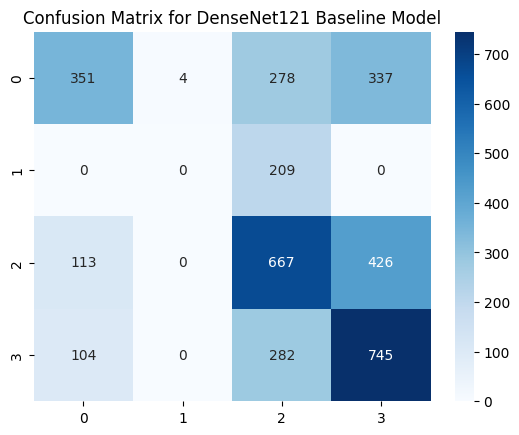

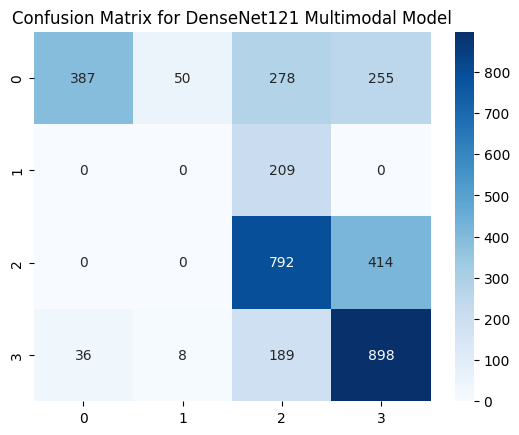

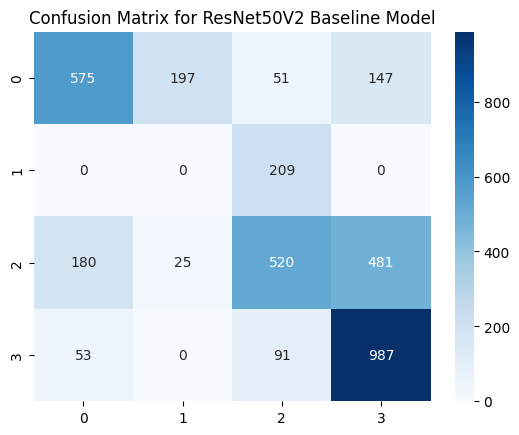

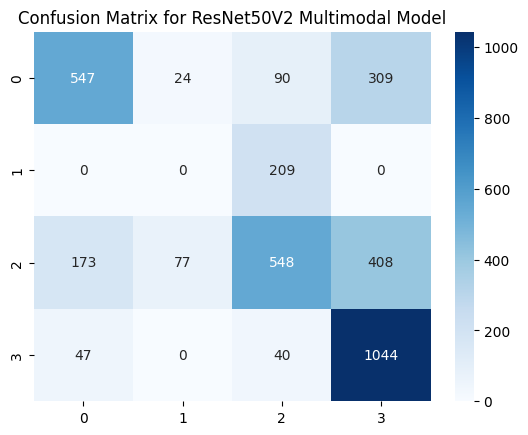

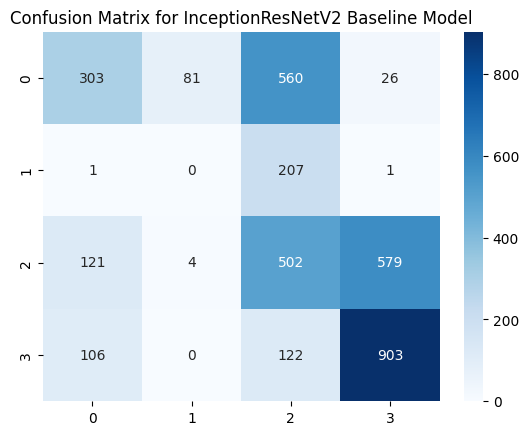

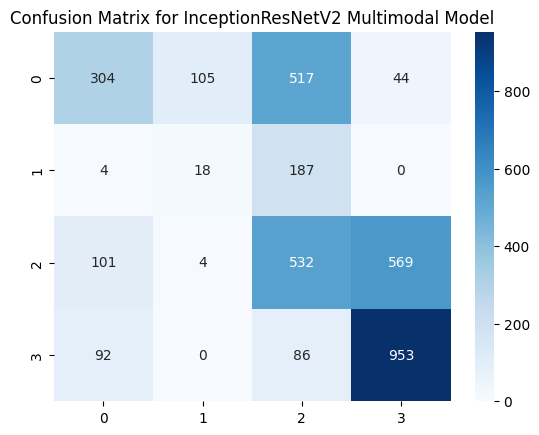

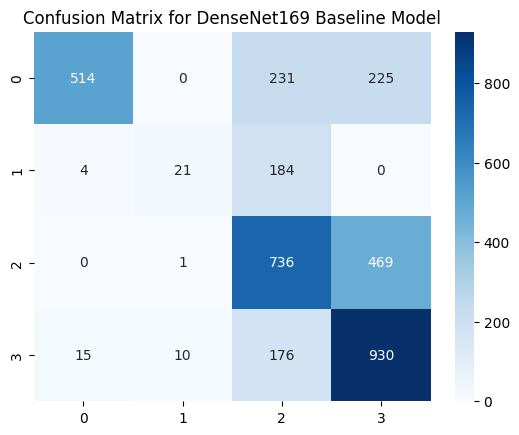

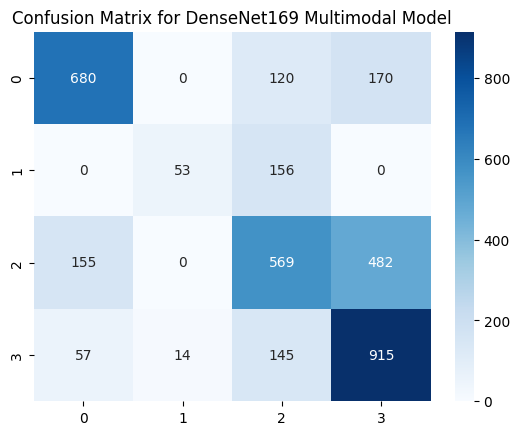

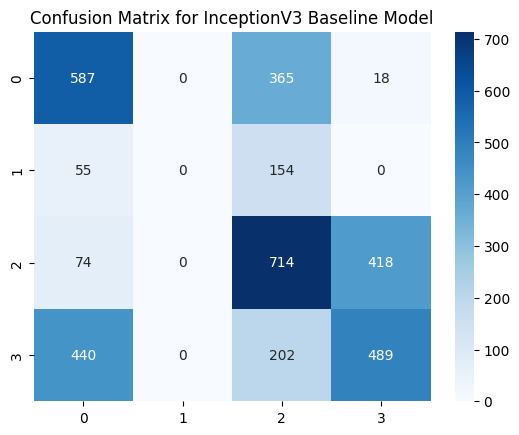

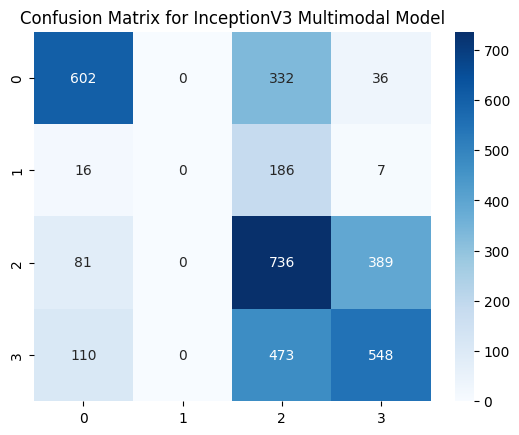

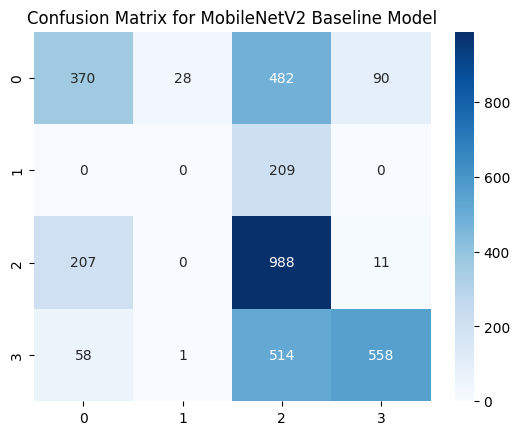

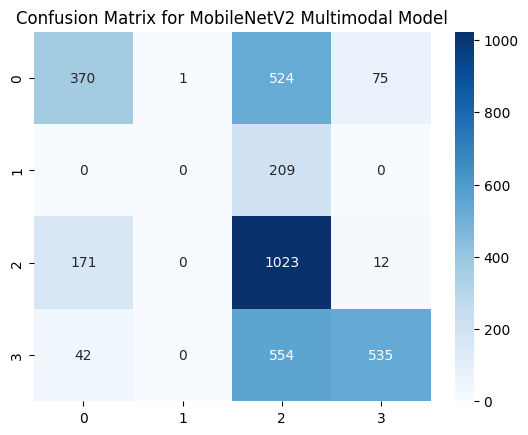

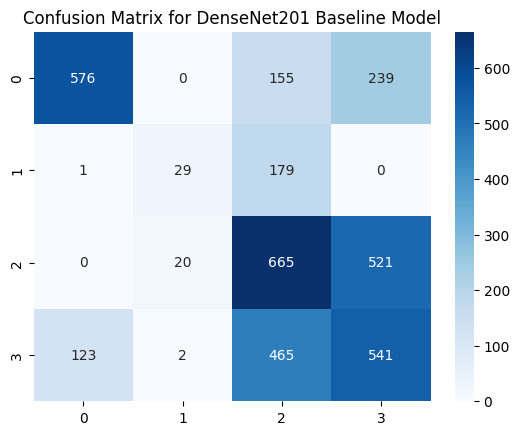

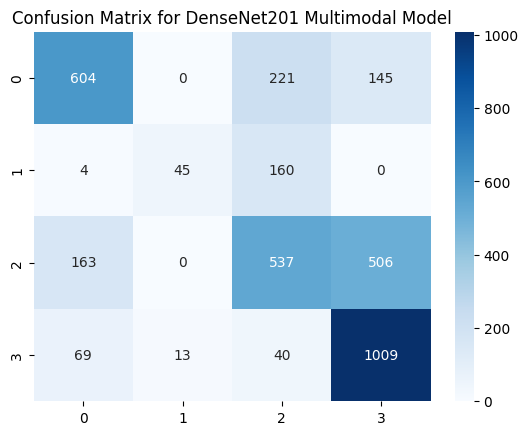

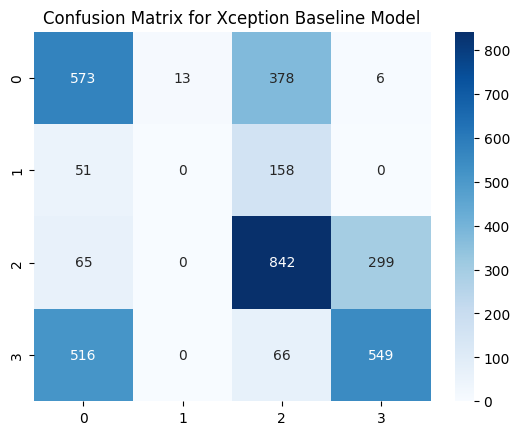

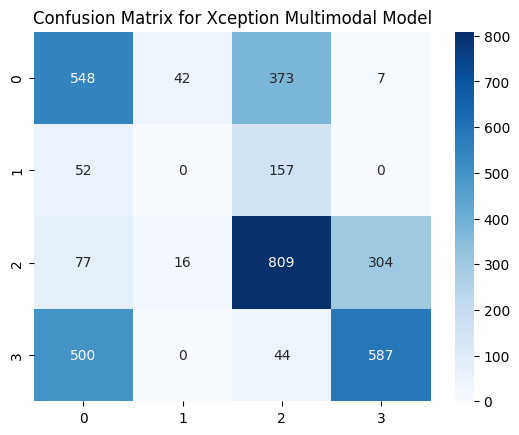

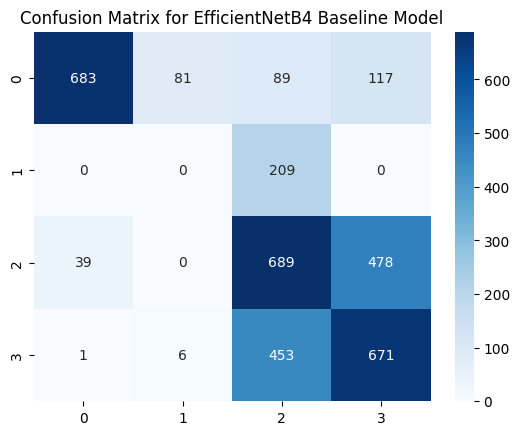

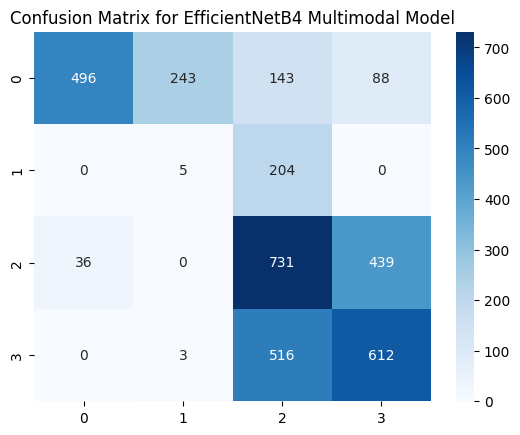

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plotting confusion matrix for a specific model
def plot_confusion_matrix(results, model_name, model_type):
    for result in results:
        if result['model_name'] == model_name:
            conf_matrix = result[model_type]['conf_matrix']
            sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
            plt.title(f'Confusion Matrix for {model_name} {model_type.capitalize()} Model')
            plt.show()
            

processor.process(plot_confusion_matrix)



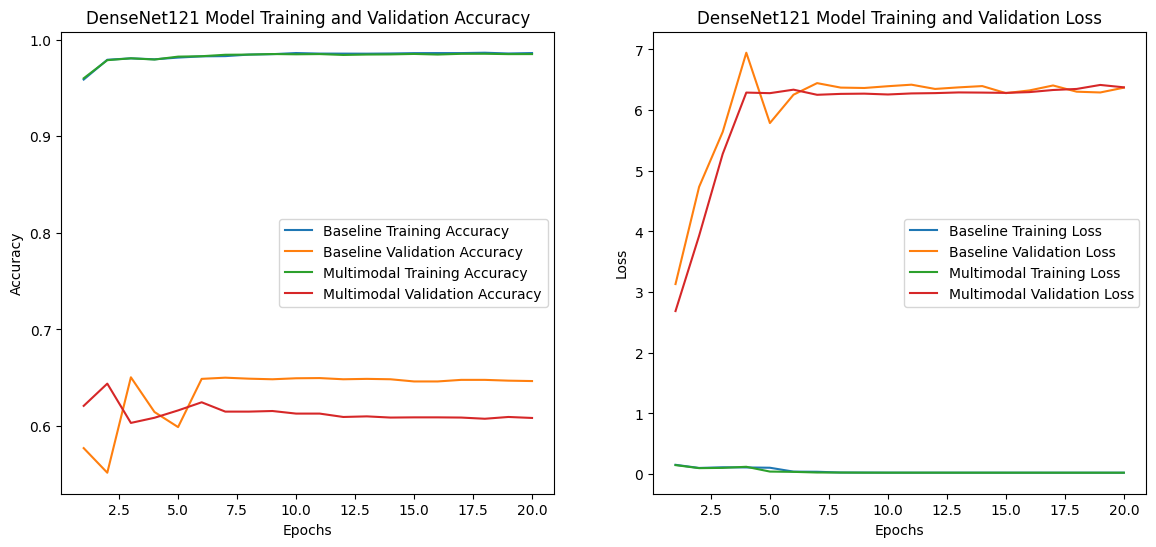

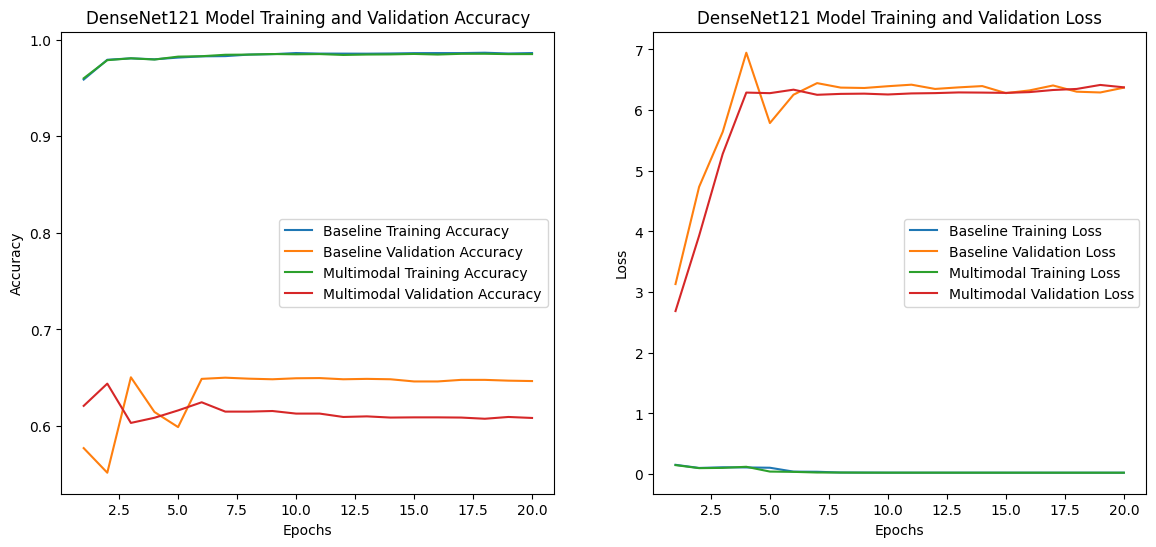

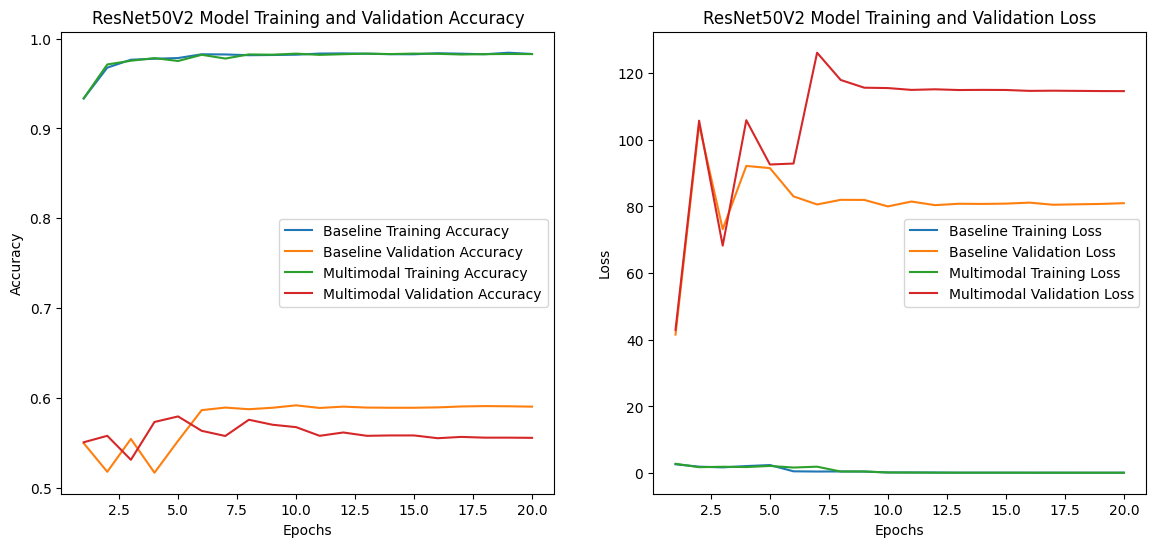

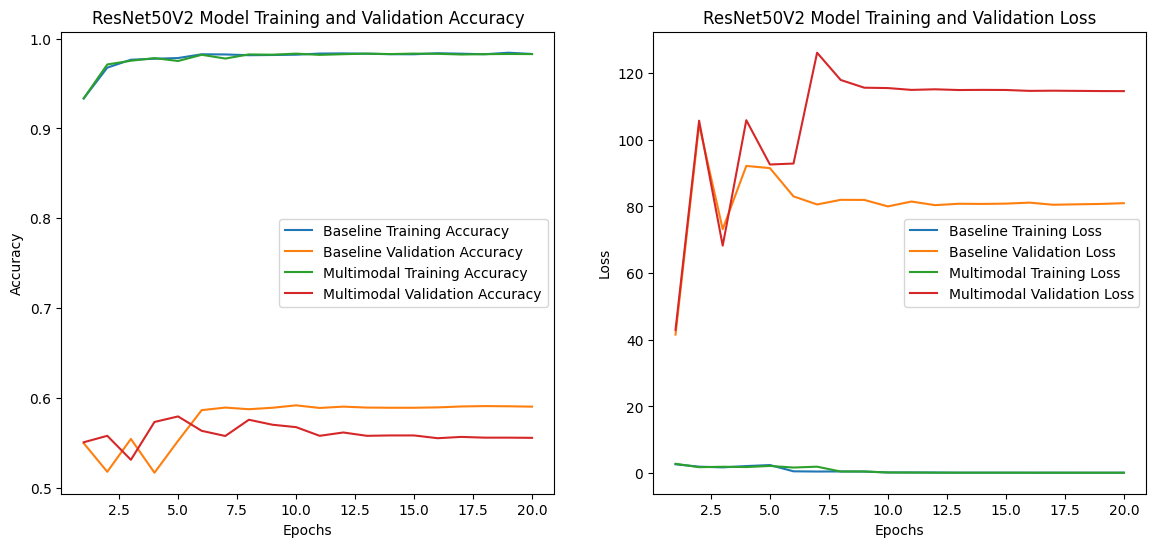

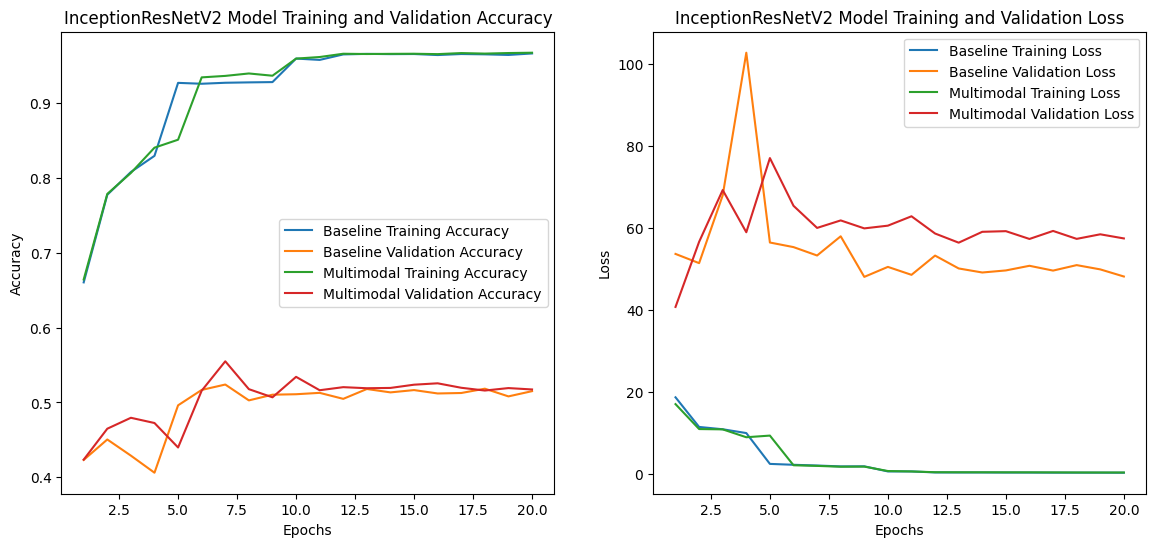

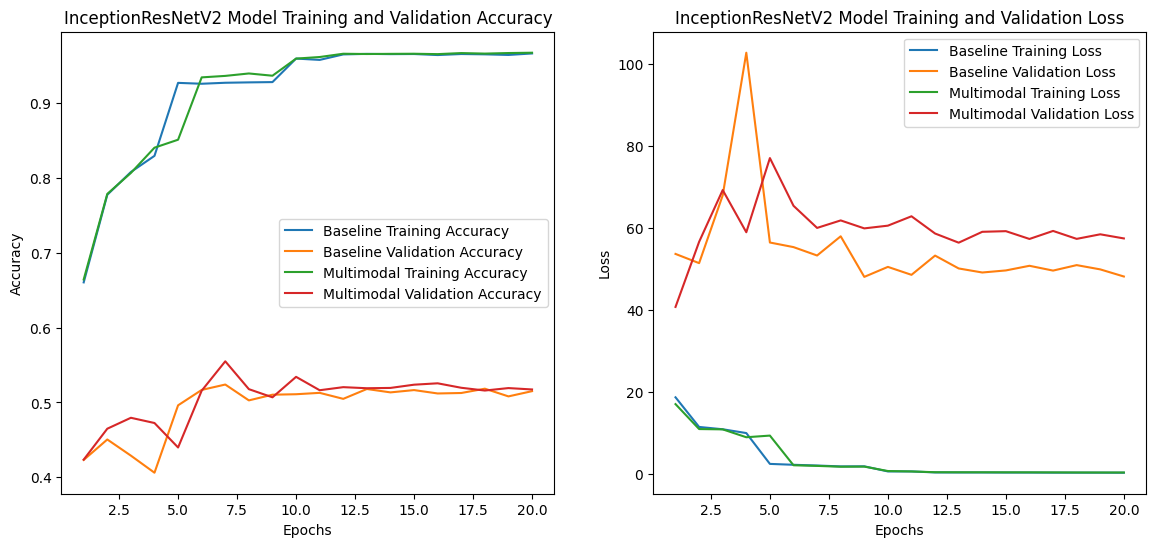

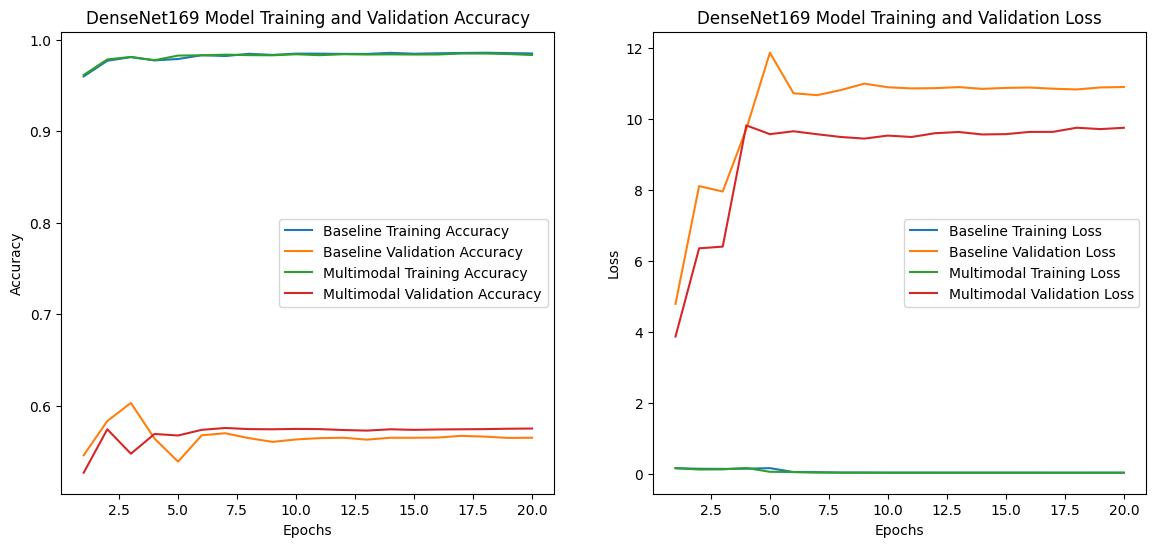

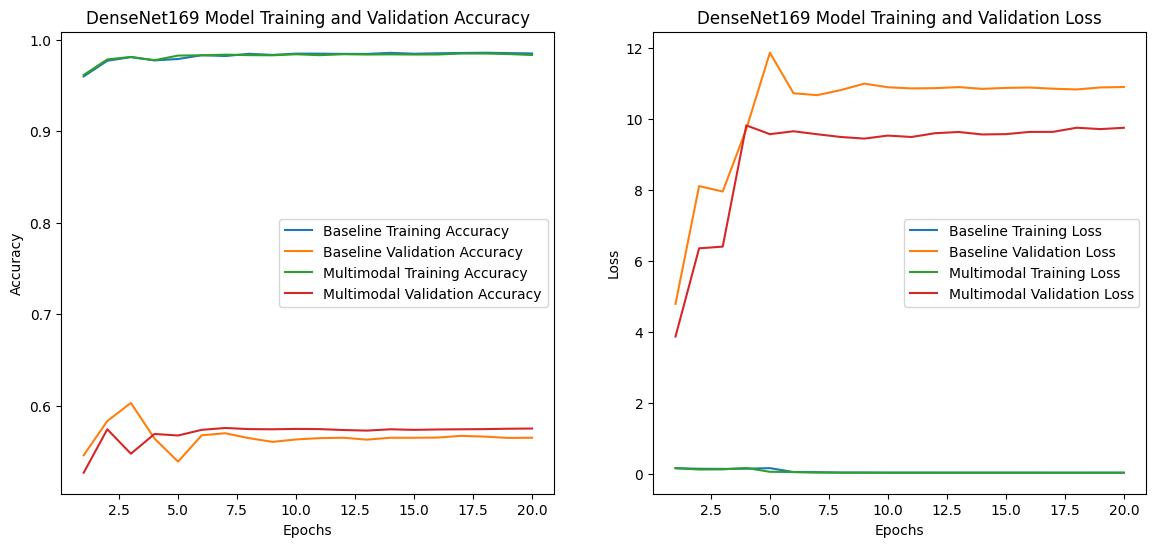

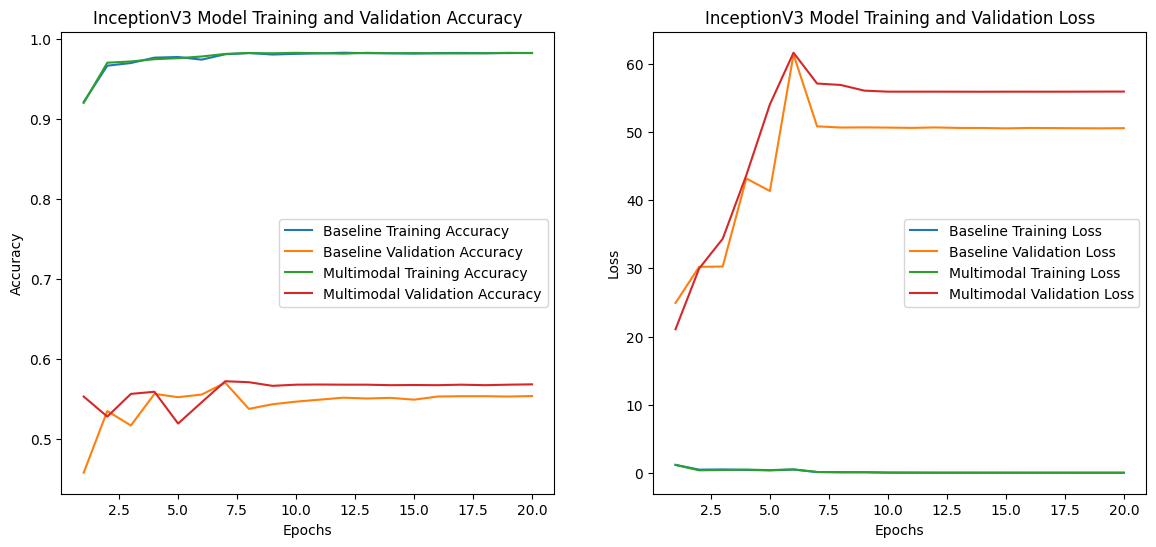

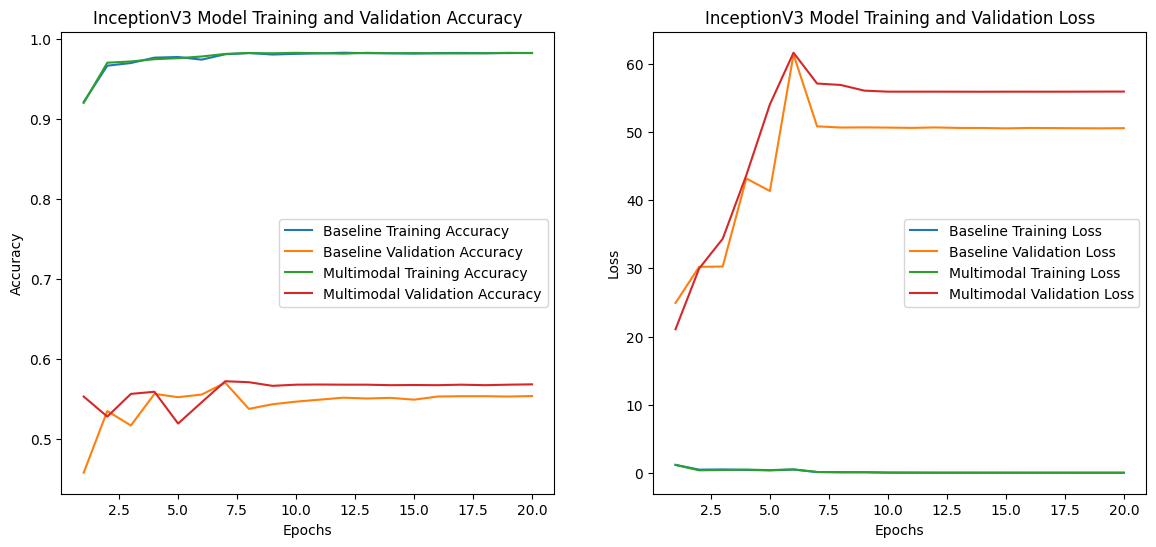

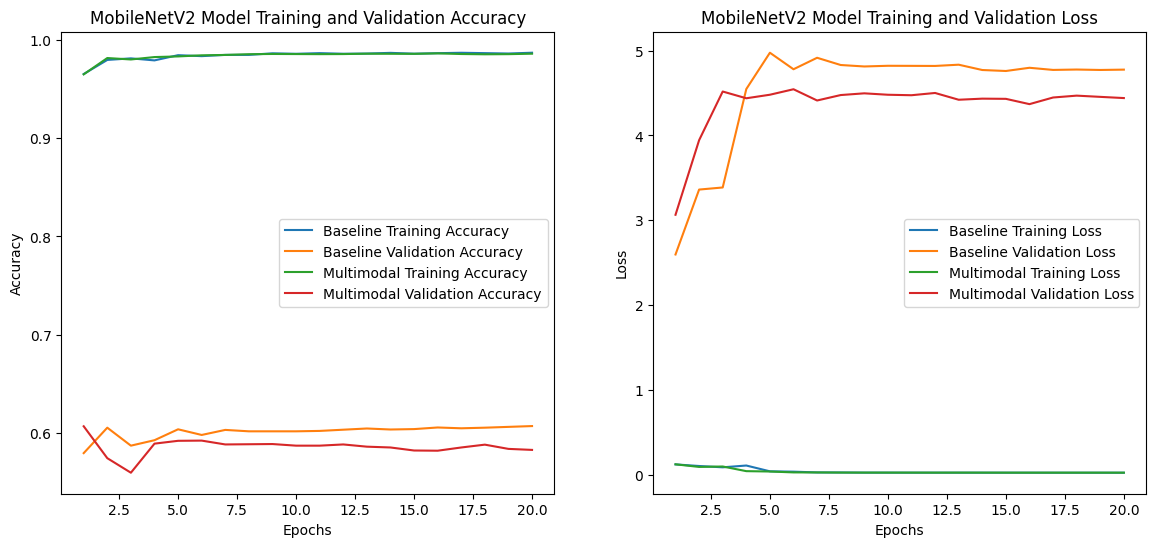

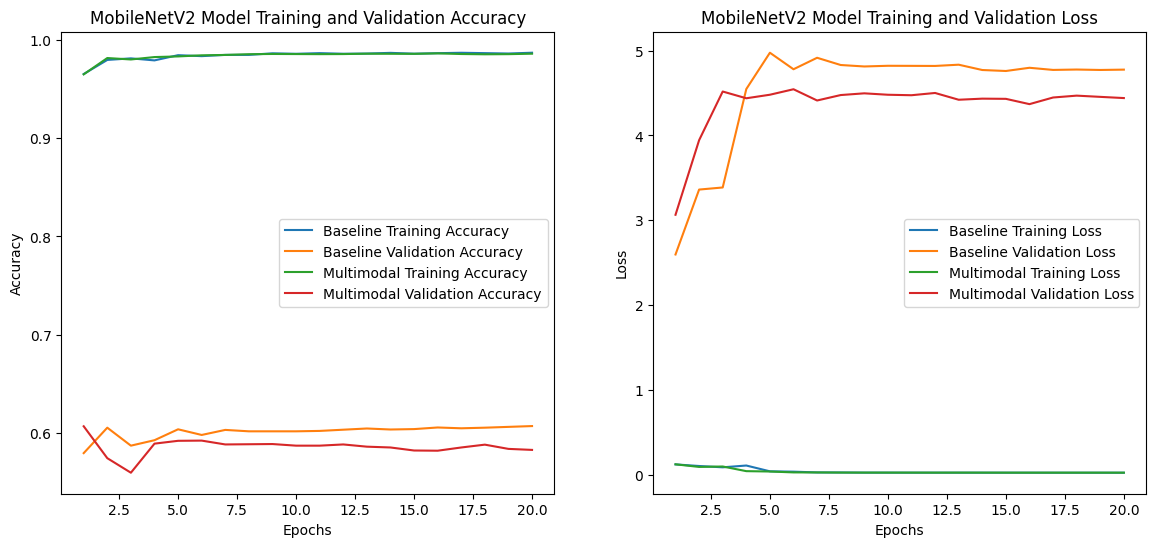

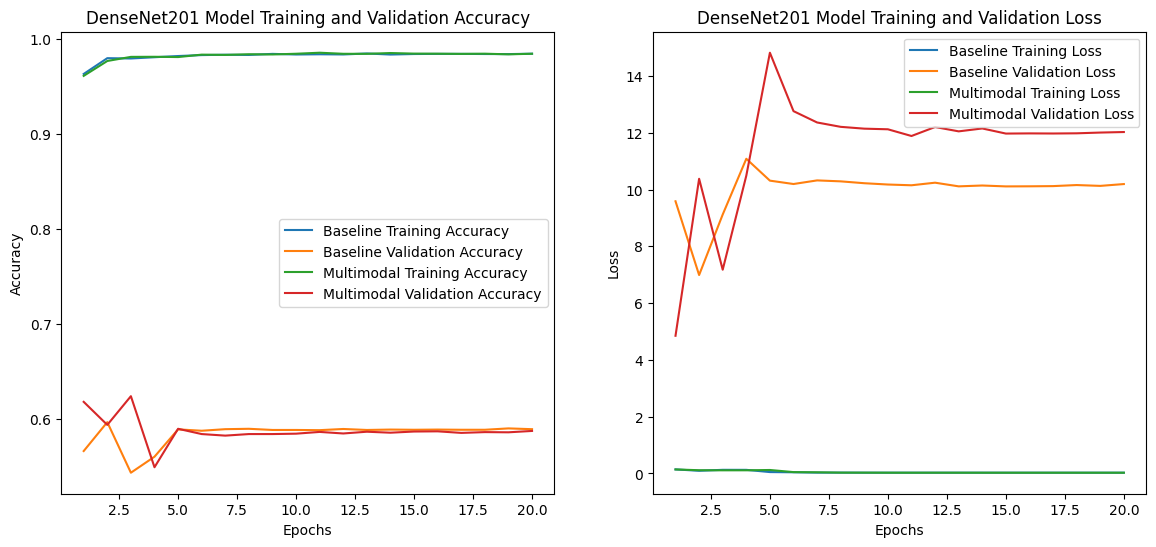

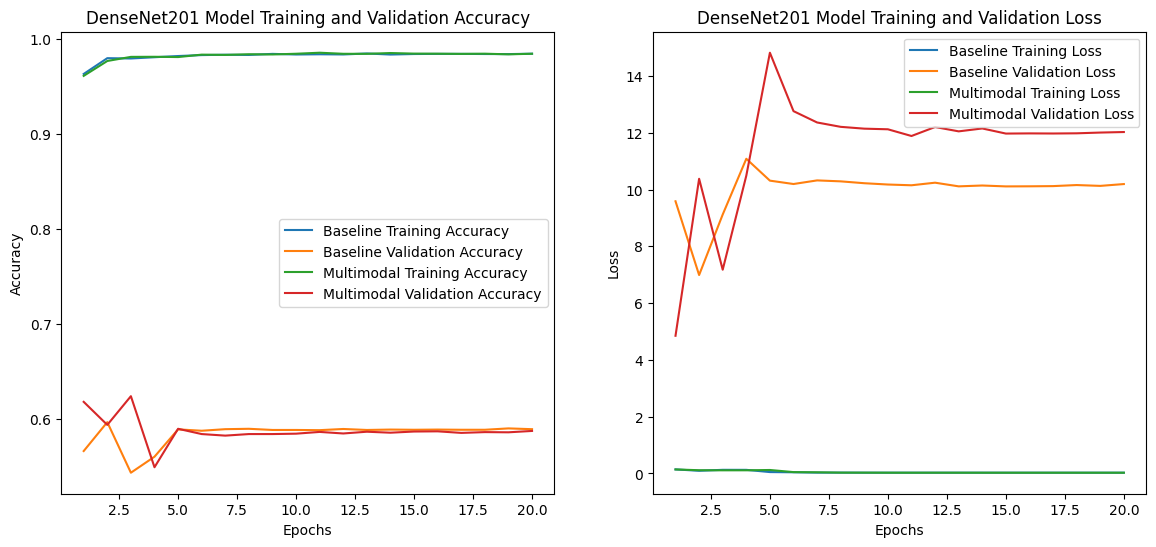

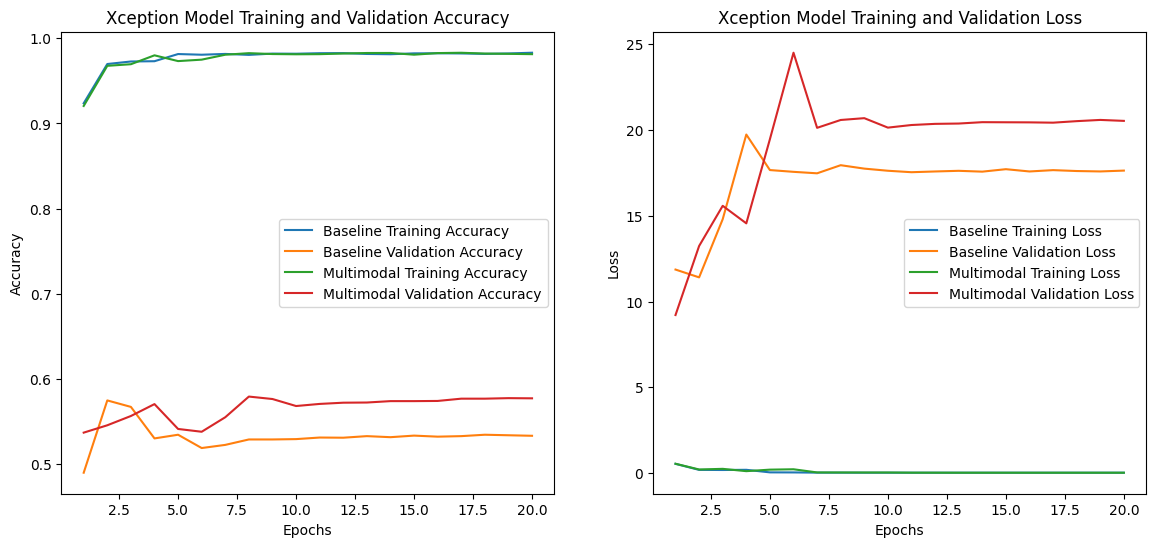

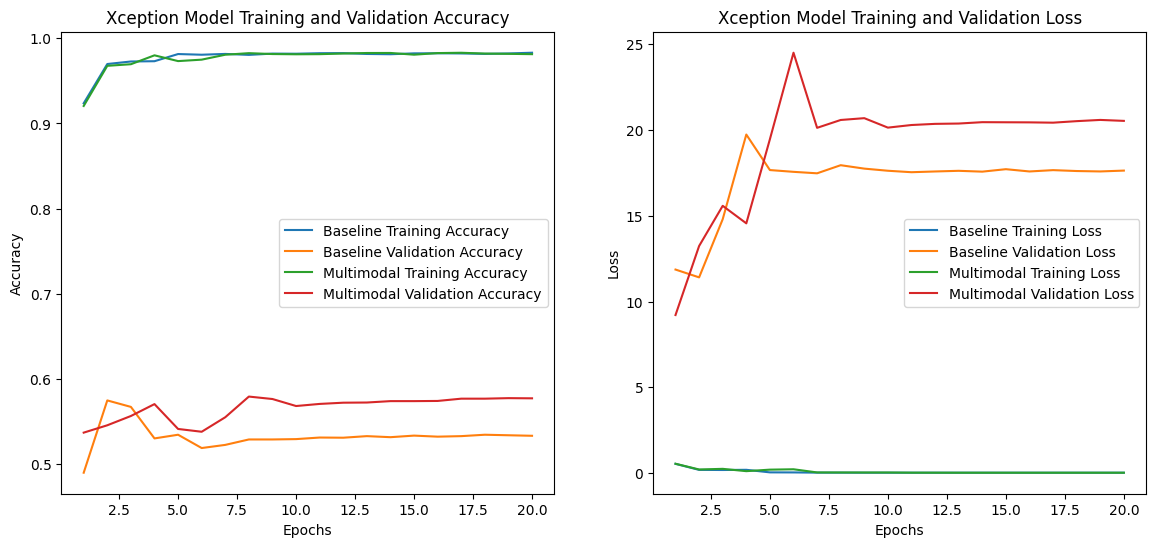

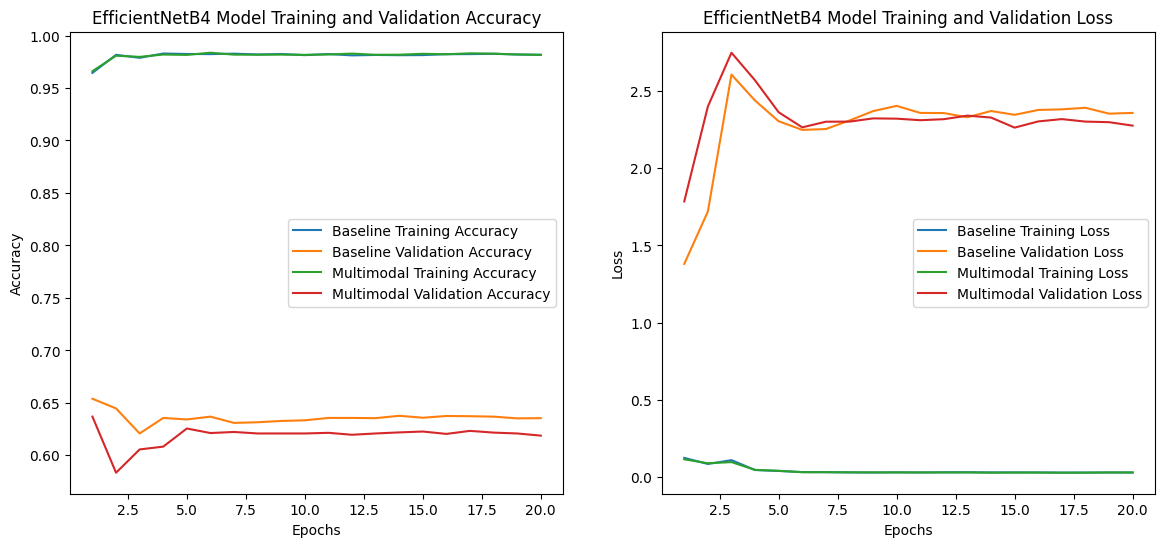

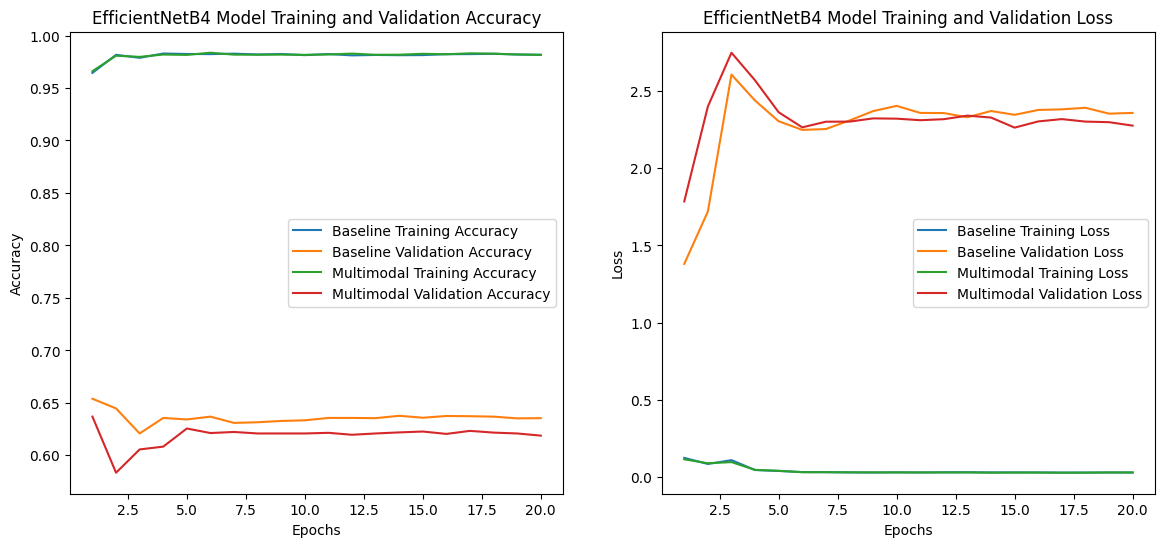

In [5]:
def compare_baseline_multimodal(results, model_name, _):
    baseline_history = None
    multimodal_history = None
    
    for result in results:
        if result['model_name'] == model_name:
            baseline_history = result['baseline']['history']
            multimodal_history = result['multimodal']['history']
            break
    
    if baseline_history and multimodal_history:
        epochs = range(1, len(baseline_history['accuracy']) + 1)
        
        plt.figure(figsize=(14, 6))
        
        # Plot accuracy comparison
        plt.subplot(1, 2, 1)
        plt.plot(epochs, baseline_history['accuracy'], label='Baseline Training Accuracy')
        plt.plot(epochs, baseline_history['val_accuracy'], label='Baseline Validation Accuracy')
        plt.plot(epochs, multimodal_history['accuracy'], label='Multimodal Training Accuracy')
        plt.plot(epochs, multimodal_history['val_accuracy'], label='Multimodal Validation Accuracy')
        plt.title(f'{model_name} Model Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        
        # Plot loss comparison
        plt.subplot(1, 2, 2)
        plt.plot(epochs, baseline_history['loss'], label='Baseline Training Loss')
        plt.plot(epochs, baseline_history['val_loss'], label='Baseline Validation Loss')
        plt.plot(epochs, multimodal_history['loss'], label='Multimodal Training Loss')
        plt.plot(epochs, multimodal_history['val_loss'], label='Multimodal Validation Loss')
        plt.title(f'{model_name} Model Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.show()

processor.process(compare_baseline_multimodal)


In [6]:
# import matplotlib.pyplot as plt
# import numpy as np

# def pad_history(history, target_length):
#     padded_history = {}
#     for key in history:
#         padded_history[key] = list(history[key]) + [0] * (target_length - len(history[key]))
#     return padded_history

# def compare_baseline_multimodal(results, model_name, _):
#     baseline_history = None
#     multimodal_history = None
    
#     for result in results:
#         if result['model_name'] == model_name:
#             baseline_history = result['baseline']['history']
#             multimodal_history = result['multimodal']['history']
#             break
    
#     if baseline_history and multimodal_history:
#         # Determine the maximum number of epochs
#         max_epochs = max(len(baseline_history['accuracy']), len(multimodal_history['accuracy']))
        
#         # Pad histories to have the same length
#         padded_baseline_history = pad_history(baseline_history, max_epochs)
#         padded_multimodal_history = pad_history(multimodal_history, max_epochs)
        
#         epochs = range(1, max_epochs + 1)
        
#         plt.figure(figsize=(14, 6))
        
#         # Plot accuracy comparison
#         plt.subplot(1, 2, 1)
#         plt.plot(epochs, padded_baseline_history['accuracy'], label='Baseline Training Accuracy')
#         plt.plot(epochs, padded_baseline_history['val_accuracy'], label='Baseline Validation Accuracy')
#         plt.plot(epochs, padded_multimodal_history['accuracy'], label='Multimodal Training Accuracy')
#         plt.plot(epochs, padded_multimodal_history['val_accuracy'], label='Multimodal Validation Accuracy')
#         plt.title(f'{model_name} Model Training and Validation Accuracy')
#         plt.xlabel('Epochs')
#         plt.ylabel('Accuracy')
#         plt.legend()
        
#         # Plot loss comparison
#         plt.subplot(1, 2, 2)
#         plt.plot(epochs, padded_baseline_history['loss'], label='Baseline Training Loss')
#         plt.plot(epochs, padded_baseline_history['val_loss'], label='Baseline Validation Loss')
#         plt.plot(epochs, padded_multimodal_history['loss'], label='Multimodal Training Loss')
#         plt.plot(epochs, padded_multimodal_history['val_loss'], label='Multimodal Validation Loss')
#         plt.title(f'{model_name} Model Training and Validation Loss')
#         plt.xlabel('Epochs')
#         plt.ylabel('Loss')
#         plt.legend()
        
#         plt.show()

# processor.process(compare_baseline_multimodal)

